In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN


In [2]:
# Load the uploaded dataset
file_path = 'household_power_consumption.csv'
data = pd.read_csv(file_path)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14748\4042141851.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
# Display the first few rows of the dataset and summary information
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


(         Date      Time Global_active_power Global_reactive_power  Voltage  \
 0  16/12/2006  17:24:00               4.216                 0.418  234.840   
 1  16/12/2006  17:25:00               5.360                 0.436  233.630   
 2  16/12/2006  17:26:00               5.374                 0.498  233.290   
 3  16/12/2006  17:27:00               5.388                 0.502  233.740   
 4  16/12/2006  17:28:00               3.666                 0.528  235.680   
 
   Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
 0           18.400          0.000          1.000            17.0  
 1           23.000          0.000          1.000            16.0  
 2           23.000          0.000          2.000            17.0  
 3           23.000          0.000          1.000            17.0  
 4           15.800          0.000          1.000            17.0  ,
 None)

In [4]:
# Specific column to check
column_name = 'Global_active_power'

# Count rows with '?' in the specified column
count_question_rows = data[data[column_name] == '?'].shape[0]
print(f"Number of rows with '?' in '{column_name}':", count_question_rows)

Number of rows with '?' in 'Global_active_power': 25979


In [5]:
# Percentage of the missing data
count_question_rows/len(data) * 100

1.2518437457686005

In [6]:
# Specific column to check
column_name = 'Sub_metering_1'

# Remove rows with '?' in the specified column
df_cleaned = data[data[column_name] != '?']
df_cleaned = df_cleaned.head(120000)
display(df_cleaned)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
120003,10/3/2007,01:27:00,0.222,0.000,242.820,1.000,0.000,0.000,0.0
120004,10/3/2007,01:28:00,0.222,0.000,242.340,1.000,0.000,0.000,0.0
120005,10/3/2007,01:29:00,0.222,0.000,242.480,1.000,0.000,0.000,0.0
120006,10/3/2007,01:30:00,0.222,0.000,242.760,1.000,0.000,0.000,0.0


In [7]:
df_cleaned = df_cleaned.sample(frac=0.1, random_state=42)

In [8]:
# Display the first few rows of the dataset and summary information
df_cleaned.head(), df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 71793 to 57239
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   12000 non-null  object 
 1   Time                   12000 non-null  object 
 2   Global_active_power    12000 non-null  object 
 3   Global_reactive_power  12000 non-null  object 
 4   Voltage                12000 non-null  object 
 5   Global_intensity       12000 non-null  object 
 6   Sub_metering_1         12000 non-null  object 
 7   Sub_metering_2         12000 non-null  object 
 8   Sub_metering_3         12000 non-null  float64
dtypes: float64(1), object(8)
memory usage: 937.5+ KB


(             Date      Time Global_active_power Global_reactive_power  \
 71793    4/2/2007  13:57:00               1.422                 0.124   
 67224    1/2/2007  09:48:00               2.402                 0.000   
 54071   23/1/2007  06:35:00               0.410                 0.000   
 7170   21/12/2006  16:54:00               1.376                 0.092   
 29622    6/1/2007  07:06:00               0.340                 0.168   
 
        Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
 71793  240.770            5.800          0.000          0.000            18.0  
 67224  236.870           11.000         17.000          0.000            17.0  
 54071  243.010            2.000          0.000          1.000             0.0  
 7170   238.400            5.800          0.000          0.000            18.0  
 29622  240.920            1.600          0.000          0.000             0.0  ,
 None)

In [9]:
# Combine Date and Time into a single datetime column
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Date'] + ' ' + df_cleaned['Time'], format='%d/%m/%Y %H:%M:%S')

In [10]:
# Drop the original Date and Time columns
df_cleaned = df_cleaned.drop(columns=['Date', 'Time'])

In [11]:
# Select numeric columns for clustering
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [12]:
# Convert columns to float
df_cleaned['Global_active_power'] = df_cleaned['Global_active_power'].astype(float)
df_cleaned['Global_reactive_power'] = df_cleaned['Global_reactive_power'].astype(float)
df_cleaned['Voltage'] = df_cleaned['Voltage'].astype(float)
df_cleaned['Global_intensity'] = df_cleaned['Global_intensity'].astype(float)
df_cleaned['Sub_metering_1'] = df_cleaned['Sub_metering_1'].astype(float)
df_cleaned['Sub_metering_2'] = df_cleaned['Sub_metering_2'].astype(float)
df_cleaned['Sub_metering_3'] = df_cleaned['Sub_metering_3'].astype(float)


In [13]:
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_cleaned[numeric_columns])

In [14]:
df_cleaned.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
71793,1.422,0.124,240.77,5.8,0.0,0.0,18.0,2007-02-04 13:57:00
67224,2.402,0.000,236.87,11.0,17.0,0.0,17.0,2007-02-01 09:48:00
54071,0.410,0.000,243.01,2.0,0.0,1.0,0.0,2007-01-23 06:35:00
7170,1.376,0.092,238.40,5.8,0.0,0.0,18.0,2006-12-21 16:54:00
29622,0.340,0.168,240.92,1.6,0.0,0.0,0.0,2007-01-06 07:06:00


In [15]:
df_cleaned_DB = df_cleaned

# Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
# Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=4) 
df_cleaned['Cluster'] = hierarchical_clustering.fit_predict(normalized_data)

In [28]:
# assigning cluster assignments and cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cleaned[['Global_active_power', 'Global_reactive_power', 'Voltage',
      'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Cluster']].head(), cluster_centers


(       Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
 71793                1.422                  0.124   240.77               5.8   
 67224                2.402                  0.000   236.87              11.0   
 54071                0.410                  0.000   243.01               2.0   
 7170                 1.376                  0.092   238.40               5.8   
 29622                0.340                  0.168   240.92               1.6   
 
        Sub_metering_1  Sub_metering_2  Sub_metering_3  Cluster  
 71793             0.0             0.0            18.0        0  
 67224            17.0             0.0            17.0        3  
 54071             0.0             1.0             0.0        1  
 7170              0.0             0.0            18.0        0  
 29622             0.0             0.0             0.0        1  ,
 array([[4.84592000e+00, 1.83360000e-01, 2.35794000e+02, 2.06800000e+01,
         1.99600000e+01, 2.29600000e+01, 1

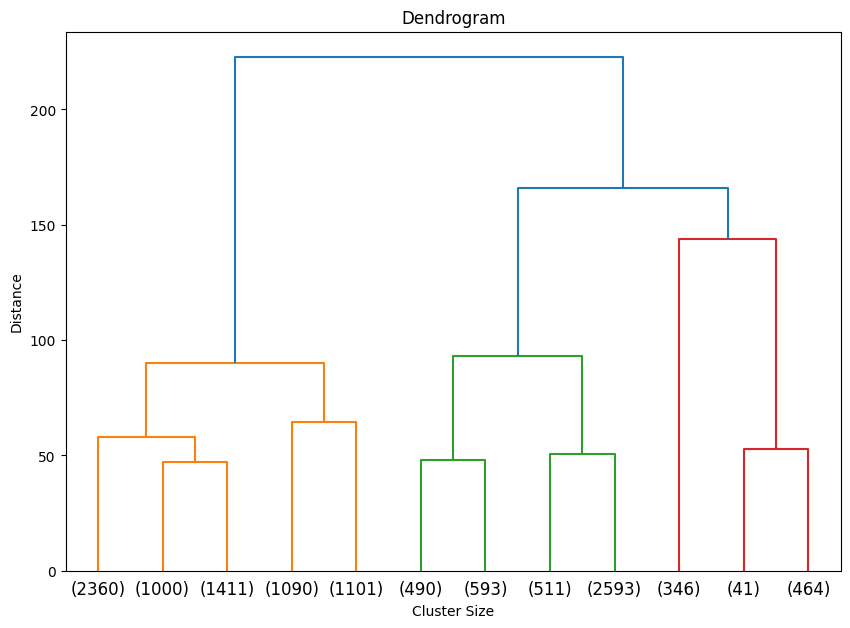

In [29]:
#dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(normalized_data, method='ward')
dendrogram(linked, truncate_mode='lastp', p=12)
plt.title('Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [30]:

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)
df_cleaned['PCA1'] = pca_data[:, 0]
df_cleaned['PCA2'] = pca_data[:, 1]


## pyplot code because plotly is not preffered

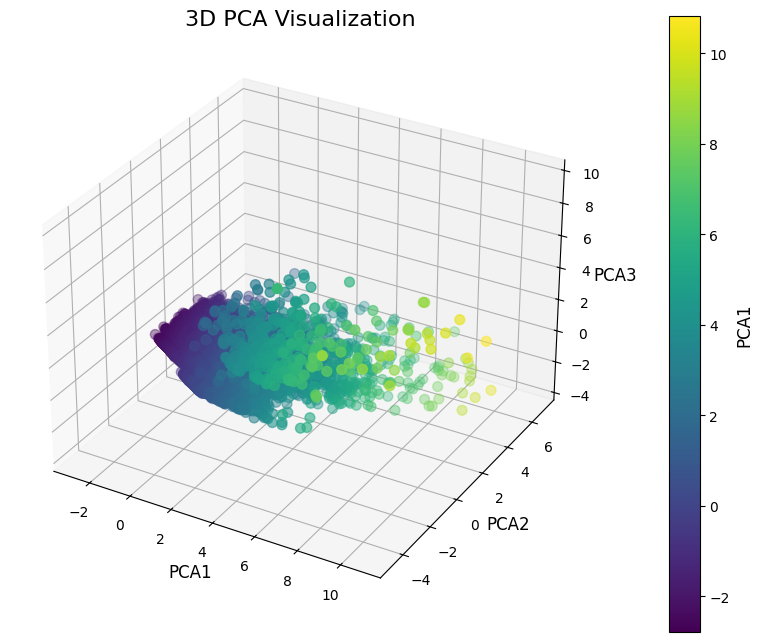

In [32]:


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


#3d scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(
    df_cleaned['PCA1'], 
    df_cleaned['PCA2'], 
    df_cleaned['PCA3'], 
    c=df_cleaned['PCA1'],  
    cmap='viridis',        
    s=50                   # Marker size
)

# Setting  axis titles
ax.set_title('3D PCA Visualization', fontsize=16)
ax.set_xlabel('PCA1', fontsize=12)
ax.set_ylabel('PCA2', fontsize=12)
ax.set_zlabel('PCA3', fontsize=12)

# Adding color bar for reference
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('PCA1', fontsize=12)


plt.show()

In [ ]:
# Evaluation Scores
silhouette_hierarchical = silhouette_score(normalized_data, hierarchical_labels)
davies_bouldin_hierarchical = davies_bouldin_score(normalized_data, hierarchical_labels)

In [ ]:
print(silhouette_hierarchical ,davies_bouldin_hierarchical)

0.40214268062282293 0.9493798244077156


# ----------------------------------------------------